# Numeri casuali e simulazione

*(Sezione 4.9 del libro di testo)*

## Generazione di numeri casuali

Python mette a disposizione una serie di funzioni per la generazione di numeri casuali (o, meglio, [pseudo-casuali](https://it.wikipedia.org/wiki/Numeri_pseudo-casuali), perché vengono generati da una formula che fa sembrare siano casuali, ma in realtà non lo sono). Tutte queste funzioni fanno parte del [modulo random](https://docs.python.org/3/library/random.html).

In [9]:
import random

In particolare, la funzione `random()` genera un numero casuale in virgola mobile compreso tra 0 ed 1.

In [10]:
random.random()

0.21143100556375405

Mentre la funzione `randint(a, b)` genera un numero casuale intero compreso tra `a` e `b` (**estremi inclusi**)

In [11]:
random.randint(1,6)

4

Infine, la funzione `randrange(a,b)` genera un numero casuale intero compreso tra `a` e `b-1`. Esattamente come `range` si può usare con un solo parametro (nel qual caso l'estremo inferiore del range è 0), o con tre parametri. In generale `randrange` sceglie casualmente un valore tra quelli generati da `range` con gli stessi parametri in input.

In [12]:
random.randrange(1, 10, 2)   # genera un numero casuale tra 1, 3, 5, 7, 9

9

## Simulazione

Una delle attività tipiche di un calcolatore è quella di simulare dei sistemi del mondo reale: ad esempio, le previsioni del tempo si realizzano tramite programmi che simulano quello che accade nell'atmosfera prendendo la situazione attuale ricavata dai satelliti.

Qualunque programma di simulazione ha comunque due componenti:
  * lo stato del sistema, ovvero l'insieme delle informazioni che fotografano tutto ciò che sappiamo del sistema che stiamo simulando in un istante di tempo.
  * l'evoluzione del sistema, ovvero il meccanismo con la quale, dato lo stato in un certo istante, si ottene lo stato all'istante successivo.
  
Un sistema si chiama *deterministico* se l'evoluzione non ha nulla di casuale. Altrimenti si parla di sistema *stocastico*. Visto che abbiamo appena imparato a generare numeri casuali, vediamo un esempi di sistema stocastico: la *passeggiata dell'ubriaco*.

### La passeggiata dell'ubriaco

Supponiamo un mondo discreto, composte da un matrice di cellette. Un ubriaco si trova inizialmente al centro di questo mondo. Siccome è ubriaco, tende a muoversi casualmente. Ogni volta sceglie a caso una delle quattro direzioni (alto, basso, sinistra, destra) e si sposta di una casella in quella direzione.

Questa che vedete qui sotto è una rappresentazione grafica della situazione:

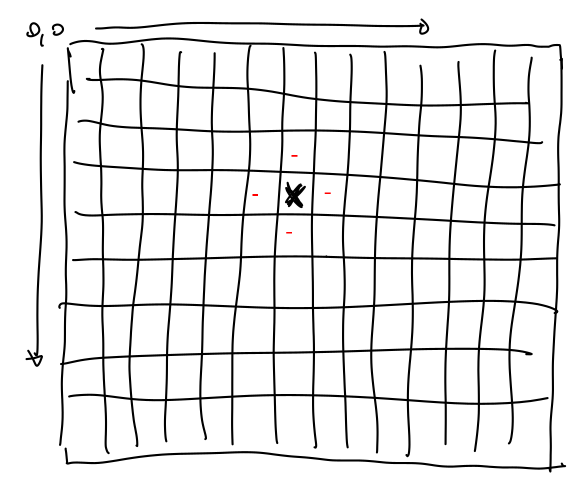

La X rappresenta la posizione attuale dell'ubriaco, mentre i trattini rossi sono le posizioni verso le quali potrebbe spostarsi casualmente.

Quello che vogliamo scrivere è un programma Python che graficamente ci mostra la traiettoria che percorre l'ubriaco nella sua camminata casuale. Il programma Python dovrà memorizzare in delle variabili lo stato del sistema (è facile, lo stato è dato dalla posizione dell'ubriaco, per cui bastano due variabili intere che sono le coordinate x ed y nella griglia) e implementare la dinamica (muoversi casualmente in una delle quattro direzioni) all'interno di un ciclo infinito.

In [ ]:
from ezgraphics import GraphicsWindow
from random import randrange

# Crea finestra.

win = GraphicsWindow()
win.setTitle("Ubriaco")
canvas = win.canvas()

# Le variabili x ed y contengono la coordinata x ed y dell'ubriaco. Come griglia
# in cui l'ubriaco si muove consideriamo il sistema di coordinate della finestra
# grafica, che va da (0,0) per il punto in alto a sinistra a (399, 399) per il punto
# in basso a destra. Pertanto, il centro della finestra ha coordinate (200, 200).
x = 200
y = 200

while True:
    # Mettiamo un puntp nella posizione attuale dell'ubriaco
    canvas.drawPoint(x, y)
    # Genero un numero casuale tra 1 e 4, che individua una delle 4 direzioni
    # in cui su può muovere l'ubriaco
    dir = randrange(4)
    # A seconda del valore di 1, muovo l'ubriaco alterando la variabile di stato x o y
    if dir == 0:
        # a destra
        x += 1
    elif dir == 1:
        # a sinstra
        x -= 1
    elif dir == 2:
        # in basso
        y += 1
    else:
        # in alto
        y -= 1

### Lancio di dadi

Stiamo giocando ad un gioco da tavolo, in cui ad un certo punto si deve tirare un certo numero di dadi e determinare la loro somma (pensate a Risiko, o a Dungeons & Dragons). Vogliamo determinare qual è il valore medio che ci possiamo aspettare dalla somma. Ovviamente è una cosa semplicissima da fare in maniera precisa usando le regole del calcolo delle probabilità, ma supponiamo di voler farlo comunque tramite una simulazione.

Ad esempio, nel caso del Risiko, potremmo scrivere un programma che per 1000 volte lancia tre dadi a 6 facce, e ne calcola la somma. Alla fine, il programma determina il valore medio di tutti questi risultati.

In [7]:
from random import randint

totale = 0
for i in range(1000):
    lancio = randint(1,6) + randint(1,6) + randint(1,6)
    totale += lancio
print("La media è ", totale/1000)

La media è  10.486


Notare che, nel programma di prima, non usiamo mai la variabile `i` al di fuori dell'istruzione `for`. Quando accade una situazione di questo tipo, possiamo anche rimpiazzare il nome della variabile dopo il for con un simbolo di sottorlineatura `_`. In questo modo è più evidente che il for serve solo a ripetere una serie di istruzioni un certo numeri di volte e che del valore effettivo del contatore non ci interessa nulla. Otteniamo quindi:

In [3]:
from random import randint

totale = 0
for _ in range(1000):
    lancio = randint(1,6) + randint(1,6) + randint(1,6)
    totale += lancio
print("La media è ", totale/1000)

La media è  10.48


Proviamo adesso a generalizzare il programma in modo che il numero di iterazioni (1000), il numero di dati (3) e il numero di facce per dado (6) siano dei parametri specificati inizialmente con delle variabili (o richiesti in input all'utente).

In [4]:
from random import randint

NUM_ITERAZIONI = 1000
NUM_DADI = 4
NUM_FACCE = 8
totale = 0
for _ in range(1000):
    lancio = 0
    for _ in range(NUM_DADI):
        lancio += randint(1, NUM_FACCE)
    totale += lancio
print("La media è ", totale/1000)

La media è  18.035


### Simulazione e giochi

Notare che i giochi hanno molto in comune con le simulazioni. Hanno anche loro un concetto di stato corrente (la posizione corrente dei pezzi nella scacchiera, la posizione di X e O nel tris, etc...). La differnza più importante è che mentre le simulazioni evolvono per i fatti propri, nei giochi c'è solitamente una interazione con continua con il giocatore che deve scegliere che mossa fare, e questa mossa ha impatto in come si modifica lo stato del gioco.

Per questo, quanto visto in questa lezione, sarà utile anche per alcuni giochi che svilupperemo nel seguito e per il progetto dell'esame di laboratorio. 